build a basic chatbot (graph api functionality)

In [30]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [31]:
class State(TypedDict):
    messages :Annotated[list,add_messages]
graph_builder = StateGraph(State)

In [32]:
import os 
from dotenv import load_dotenv
load_dotenv()


True

In [33]:
graph_builder

In [34]:
from langchain_groq import ChatGroq 
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-70b-8192")

In [35]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1093d88b0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1087a4a30>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [36]:
llm = init_chat_model("groq:llama3-70b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x109405bb0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1095b5ca0>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [38]:
##node functionality
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}


In [40]:
graphbuilder=StateGraph(State)
##adding the node to the graph
graphbuilder.add_node(
    "llmchatbot",
    chatbot)
##adding edges to the graph
graphbuilder.add_edge(START, "llmchatbot")
graphbuilder.add_edge("llmchatbot", END)

##compiling the graph
graph = graphbuilder.compile()

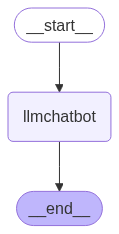

In [41]:
from IPython.display import Image, display
try :
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception :
    pass 

In [ ]:
graph.invoke({"messages": ["Hello, how are you?"]})

TypeError: unhashable type: 'dict'